# **HIT TRACK ANALYZER**

**Use the Spotify dataset to predict the popularity score of songs and determine whether a song is a hit or not.**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/spotify_dataset.csv")

In [ ]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Understanding the data

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
data.shape

(114000, 21)

In [ ]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,113950.000000,114000.000000,114000.000000,114000.000000,113923.000000,113994.000000,113967.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.259202,0.637553,0.084652,0.314910,0.156061,0.213551,0.474072,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029291,0.480709,0.105732,0.332523,0.309568,0.190380,0.259264,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
data=data.drop(["Unnamed: 0","track_id"],axis=1)

Dealing the null values for the numerical features with mean and categirical features with mode

In [ ]:
for i in ["loudness","instrumentalness","liveness","valence"]:
    data[i]=data[i].fillna(data[i].median())

In [ ]:
for i in ['artists','album_name','track_name']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [ ]:
data.isna().sum()

,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


Dealing duplicates values

In [ ]:
data.duplicated().sum()


np.int64(575)

In [ ]:
data.drop_duplicates(inplace=True)


In [ ]:
data.duplicated().sum()


np.int64(0)

In [ ]:
data.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

Exploratory data analysis

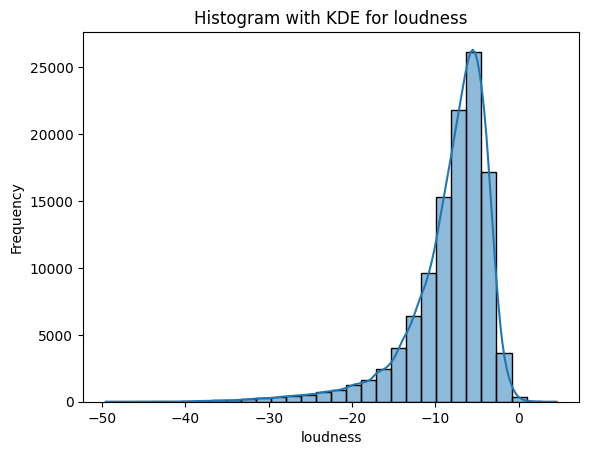

In [ ]:
sns.histplot(data['loudness'], kde=True, bins=30)
plt.title('Histogram with KDE for loudness')
plt.xlabel('loudness')
plt.ylabel('Frequency')
plt.show()

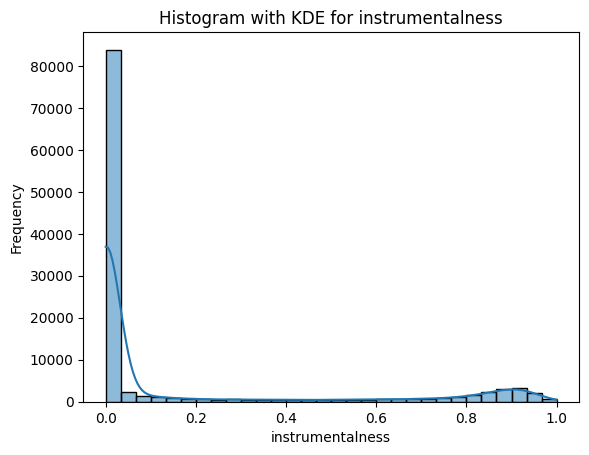

In [ ]:
sns.histplot(data['instrumentalness'], kde=True, bins=30)
plt.title('Histogram with KDE for instrumentalness')
plt.xlabel('instrumentalness')
plt.ylabel('Frequency')
plt.show()

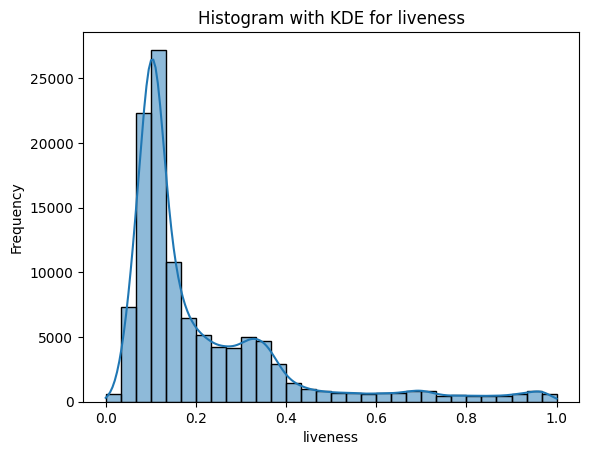

In [ ]:
sns.histplot(data['liveness'], kde=True, bins=30)
plt.title('Histogram with KDE for liveness')
plt.xlabel('liveness')
plt.ylabel('Frequency')
plt.show()

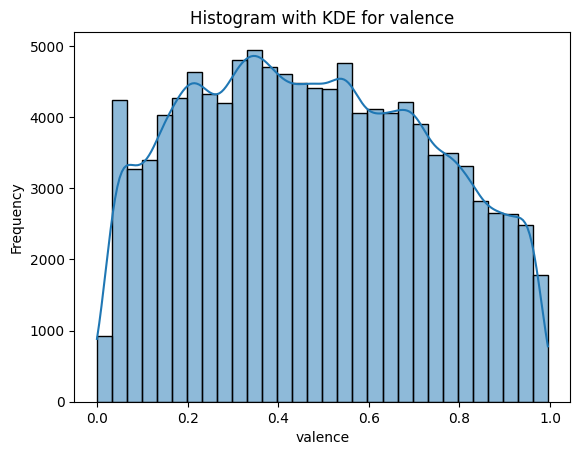

In [ ]:
sns.histplot(data['valence'], kde=True, bins=30)
plt.title('Histogram with KDE for valence')
plt.xlabel('valence')
plt.ylabel('Frequency')
plt.show()

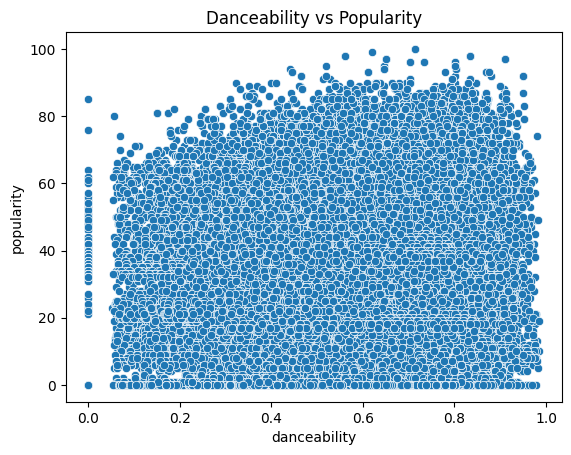

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


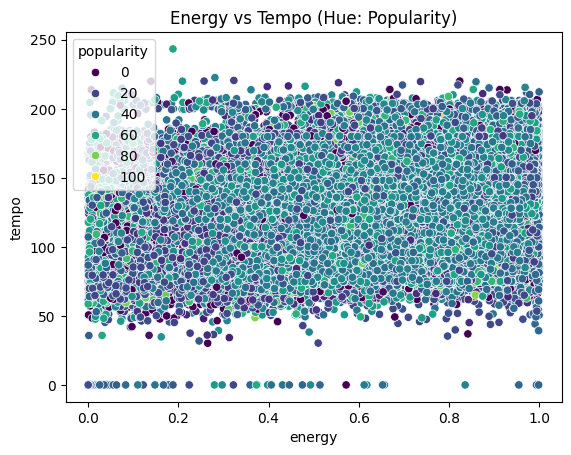

In [ ]:
sns.scatterplot(data=data, x='danceability', y='popularity')
plt.title("Danceability vs Popularity")
plt.show()
sns.scatterplot(data=data, x='energy', y='tempo', hue='popularity', palette='viridis')
plt.title("Energy vs Tempo (Hue: Popularity)")
plt.show()


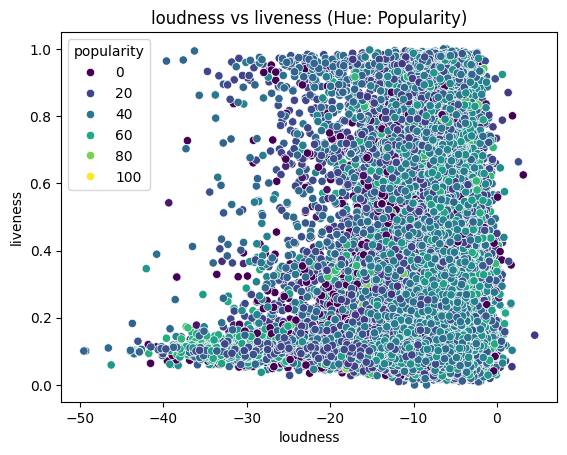

In [ ]:
sns.scatterplot(data=data, x='loudness', y='liveness', hue='popularity', palette='viridis')
plt.title("loudness vs liveness (Hue: Popularity)")
plt.show()


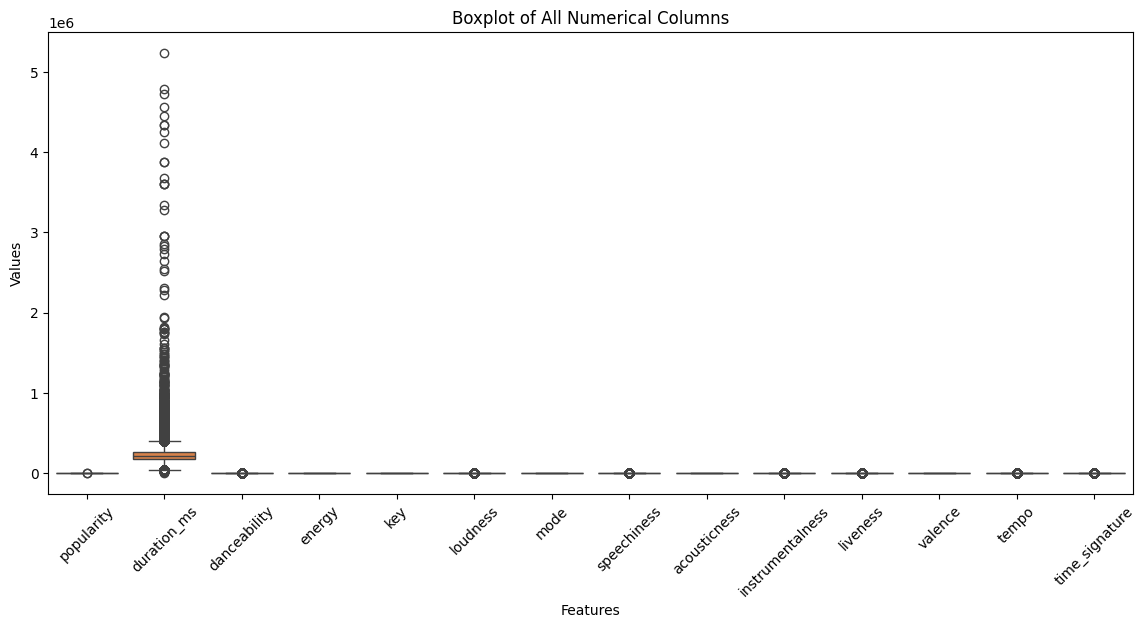

In [ ]:
numerical_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                  'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'time_signature']

# Create a boxplot for all numerical columns
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[numerical_cols])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title("Boxplot of All Numerical Columns")
plt.xlabel("Features")
plt.ylabel("Values")

# Show plot
plt.show()


Outlier handling

In [ ]:
# Calculate IQR
Q1 = data['duration_ms'].quantile(0.25)
Q3 = data['duration_ms'].quantile(0.75)
IQR = Q3 - Q1

# Set limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop only extreme outliers
data = data[(data['duration_ms'] >= lower_bound) & (data['duration_ms'] <= upper_bound)]


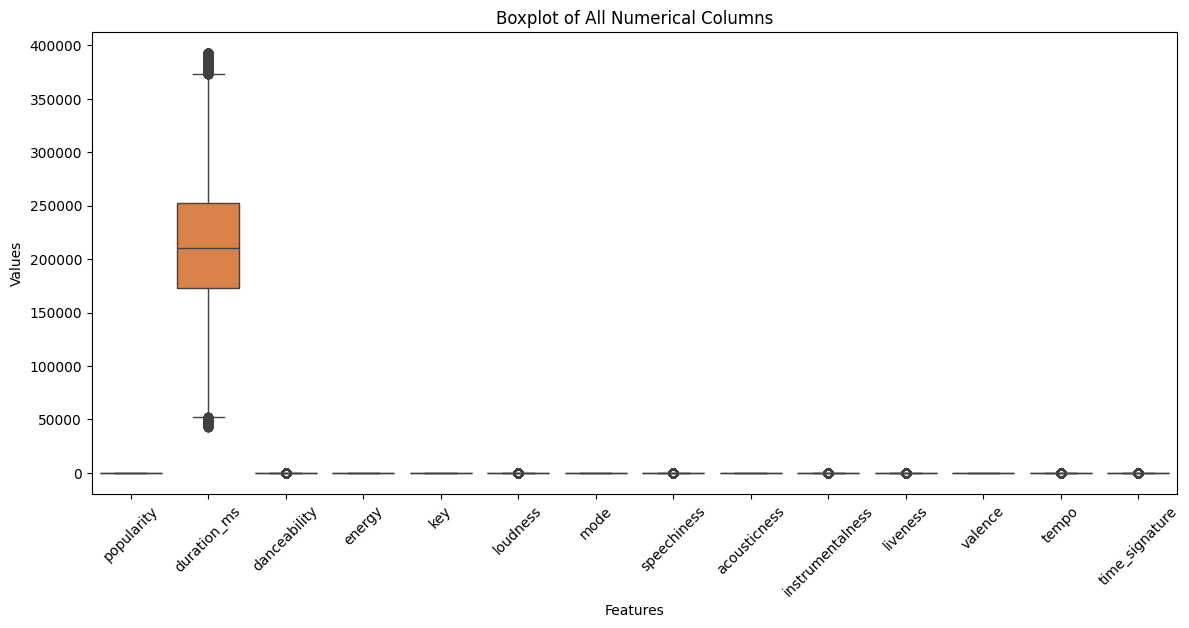

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[numerical_cols])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title("Boxplot of All Numerical Columns")
plt.xlabel("Features")
plt.ylabel("Values")

# Show plot
plt.show()


In [ ]:
categorical_cols=['artists', 'album_name', 'track_name','track_genre','explicit']

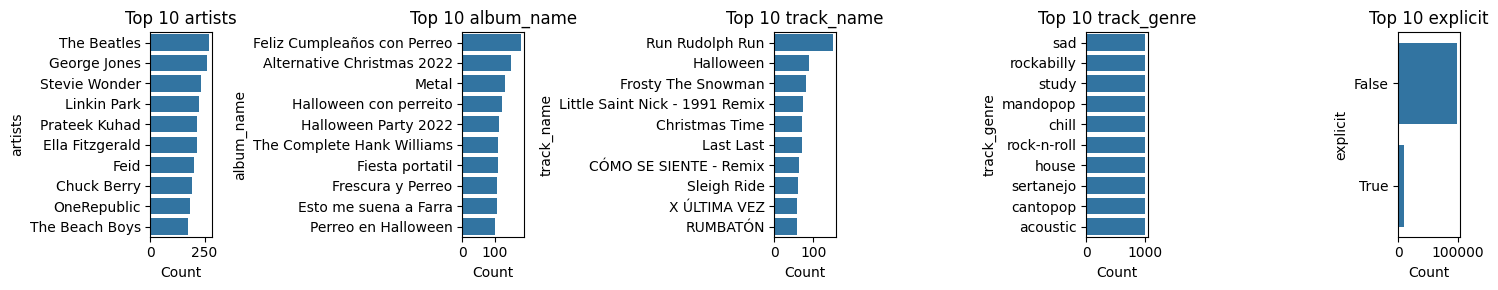

In [ ]:
plt.figure(figsize=(15, 3))

# Loop through each categorical column and create a countplot
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 5, i)  # 1 row, 3 columns, ith plot
    sns.countplot(y=data[col], order=data[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Top 10 {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix=data[numerical_cols].corr()

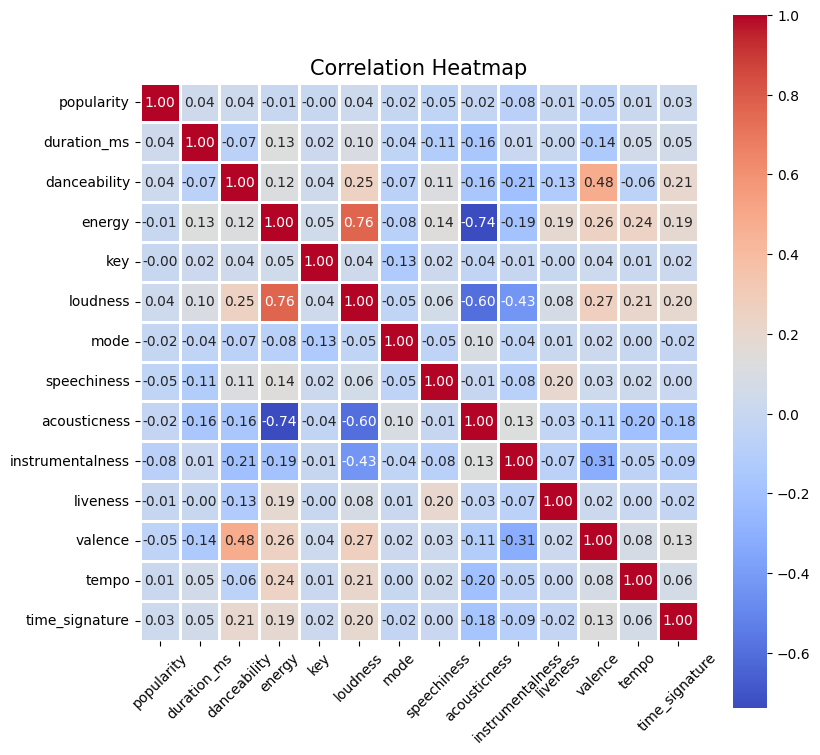

In [ ]:
plt.figure(figsize=(9, 9))  # Increase size further for better clarity

# Create heatmap with larger font
sns.heatmap(corr_matrix,
            annot=True,              # Show correlation values inside cells
            fmt=".2f",               # Limit decimals to 2
            cmap="coolwarm",         # Use a better colormap
            linewidths=1,            # Add spacing between cells
            square=True,             # Keep it proportional
            annot_kws={"size": 10})  # Make text inside cells bigger

# Rotate labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add title
plt.title("Correlation Heatmap", fontsize=15)

# Show plot
plt.show()

Dropping irrevalent features for prediction

In [ ]:
data = data.drop(['key', 'mode', 'time_signature'], axis=1)


In [ ]:
data['explicit'] = data['explicit'].astype(int)


In [ ]:
data["artists"].nunique()

30119

In [ ]:
data["track_genre"].nunique()

114

In [ ]:
data["album_name"].nunique()

44591

In [ ]:
data["track_name"].nunique()

69480

In [ ]:
data = data.drop('track_name', axis=1)


Checking the association between the categorical variable and the target variable



In [ ]:
from scipy.stats import f_oneway

groups = [group['popularity'].values for name, group in data.groupby('track_genre')]
f_stat, p_val = f_oneway(*groups)

print('ANOVA p-value:', p_val)
# if p_val < 0.05, significant relationship exists


ANOVA p-value: 0.0


In [ ]:
groups = [group['popularity'].values for name, group in data.groupby('album_name')]
f_stat, p_val = f_oneway(*groups)

print('ANOVA p-value:', p_val)


ANOVA p-value: 0.0


In [ ]:
groups = [group['popularity'].values for name, group in data.groupby('artists')]
f_stat, p_val = f_oneway(*groups)

print('ANOVA p-value:', p_val)


ANOVA p-value: 0.0


Encoding

In [ ]:
# Target Encoding for artists and album_name
artist_mean_popularity = data.groupby('artists')['popularity'].mean()
data['artists'] = data['artists'].map(artist_mean_popularity)

album_mean_popularity = data.groupby('album_name')['popularity'].mean()
data['album_name'] = data['album_name'].map(album_mean_popularity)

# Label Encoding for track_genre
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['track_genre'] = le.fit_transform(data['track_genre'])



In [ ]:
data.columns

Index(['artists', 'album_name', 'popularity', 'duration_ms', 'explicit',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre'],
      dtype='object')

In [ ]:
x=data.drop(["popularity"],axis=1)
y=data["popularity"]

In [ ]:
x.head()

,artists,album_name,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,58.000000,73.0,230666,0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,0
1,42.923077,55.0,149610,0,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,0
2,57.000000,57.0,210826,0,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,0
3,53.933333,71.0,201933,0,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,0
4,41.727273,39.0,198853,0,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,0


In [ ]:
y.head()

,popularity
0,73
1,55
2,57
3,71
4,82


Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler(feature_range=(0,1))


In [ ]:
x= ms.fit_transform(x)

In [ ]:
x = pd.DataFrame(x, columns=[
    'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'artist', 'album_name',
       'track_genre'
])


In [ ]:
x.head()

,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,album_name,track_genre
0,0.580000,0.73,0.536431,0.0,0.686294,0.4610,0.791392,0.148494,0.032329,0.000001,0.3580,0.718593,0.361245,0.0
1,0.429231,0.55,0.304573,0.0,0.426396,0.1660,0.597377,0.079232,0.927711,0.000006,0.1010,0.268342,0.318397,0.0
2,0.570000,0.57,0.479679,0.0,0.444670,0.3590,0.736123,0.057840,0.210843,0.000000,0.1170,0.120603,0.313643,0.0
3,0.539333,0.71,0.454241,0.0,0.270051,0.0596,0.573701,0.037695,0.908635,0.000071,0.1320,0.143719,0.746758,0.0
4,0.417273,0.39,0.445431,0.0,0.627411,0.4430,0.737103,0.054621,0.470884,0.000000,0.0829,0.167839,0.492863,0.0


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


Try different Regression Algorithms

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 14.957733301649151
R²: 0.9702490057432165


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

# Predict on test set
y_pred = lr.predict(x_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 20.993773850899085
R² Score: 0.9582432957808221


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the model
lasso = Lasso()

# Define hyperparameters to test
params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Grid Search to find best alpha
grid = GridSearchCV(lasso, params, cv=5)
grid.fit(x, y)

# Best model
best_lasso = grid.best_estimator_
print("Best alpha for Lasso:", grid.best_params_['alpha'])


Best alpha for Lasso: 0.001


In [ ]:
y_pred = grid.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso MSE:", mse)
print("Lasso R²:", r2)


Lasso MSE: 20.988451687061524
Lasso R²: 0.9582538815870115


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

grid1 = GridSearchCV(ridge, params, cv=5)
grid1.fit(x, y)

best_ridge = grid1.best_estimator_
print("Best alpha for Ridge:", grid1.best_params_['alpha'])


Best alpha for Ridge: 0.001


In [ ]:
y_pred1 = grid.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred)

print("Lasso MSE:", mse)
print("Lasso R²:", r2)


Lasso MSE: 20.988451687061524
Lasso R²: 0.9582538815870115


In [ ]:
from sklearn.svm import SVR
# SVR model
svr = SVR(kernel='rbf', C=10, gamma='scale')
svr.fit(x_train, y_train)

# Prediction and inverse transform
y_pred = svr.predict(x_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 21.240953774490116
R2 Score: 0.9577516538763405


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 29.36649821503083
R²: 0.9415899119125958


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(x_train, y_train)

# Predict on test data
y_pred = gbr.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor MSE:", mse)
print("Gradient Boosting Regressor R²:", r2)


Gradient Boosting Regressor MSE: 18.37531751918192
Gradient Boosting Regressor R²: 0.9634514164041499


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn = KNeighborsRegressor(n_neighbors=4)  # You can tune this number

# Fit the model
knn.fit(x_train, y_train)

# Predict
y_pred = knn.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("KNN Regressor MSE:", mse)
print("KNN Regressor R²:", r2)


KNN Regressor MSE: 30.940849714868563
KNN Regressor R²: 0.9384585201779493


In [ ]:

from xgboost import XGBRegressor

# Initialize the model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb.fit(x_train, y_train)

# Predict
y_pred = xgb.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regressor MSE:", mse)
print("XGBoost Regressor R²:", r2)


XGBoost Regressor MSE: 18.36852264404297
XGBoost Regressor R²: 0.9634649157524109


Random Forest is selected as the best algorithm.

In [ ]:
import pickle


In [ ]:
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(ms, f)

with open("track_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

